In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Importing data
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST_FINAL.csv')
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [3]:
# Rename the values on "Discount" 
train['Discount'] = train['Discount'].map({'Yes': 1, 'No': 0})

In [4]:
# Data types
print('Data type per variable:')
print(train.dtypes)

Data type per variable:
ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount           int64
#Order             int64
Sales            float64
dtype: object


In [5]:
# Changing data types
train[['Store_id', 'Holiday', 'Discount']] = train[['Store_id', 'Holiday', 'Discount']].astype(object)
train['Date'] = pd.to_datetime(train.Date)

In [6]:
# Do we have duplicates?
print('Number of duplicates:', len(train[train.duplicated()]))

# Do we have missing values?
print('Number of missing values:', train.isnull().sum().sum())

Number of duplicates: 0
Number of missing values: 0


findfont: Font family ['Source Sans Pro'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Source Sans Pro'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Source Sans Pro'] not found. Falling back to DejaVu Sans.


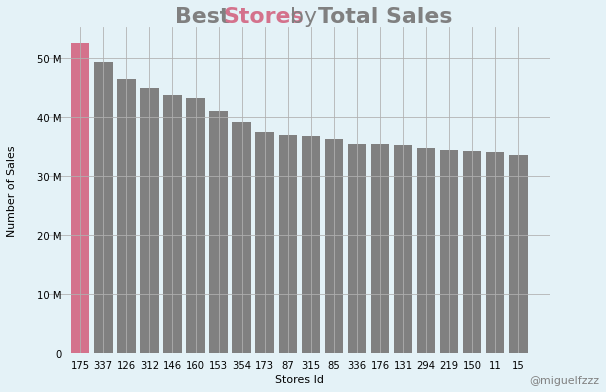

In [7]:
import matplotlib.pyplot as plt
# Which are the best stores (by number of sells)?
best_stores = train.groupby(['Store_id'], as_index=False)['Sales'].sum()        # sum sales from same store
best_stores = best_stores.sort_values('Sales', ascending = False)                # sort data
best_stores = best_stores.head(20)                                               # select top 20
best_stores['Store_id'] = best_stores['Store_id'].astype(str)

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

# For changing colors
col1 = best_stores.head(1)
col2 = best_stores.tail(19)

ax.bar(col1.Store_id, col1.Sales, color = '#d4728c')
ax.bar(col2.Store_id, col2.Sales, color = 'grey')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(mticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Stores Id', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Title
plt.text(4.1, 56000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(6.2, 56000000, "Stores", size=22, color="#d4728c", fontweight="bold")
plt.text(9.1, 56000000, "by", size=22, color="grey")
plt.text(10.3, 56000000,"Total Sales", size=22, color="grey", fontweight="bold")

# Author
plt.text(22.5, -5000000, "@miguelfzzz", fontsize=11, ha="right", color='grey');

NameError: name 'ticker' is not defined

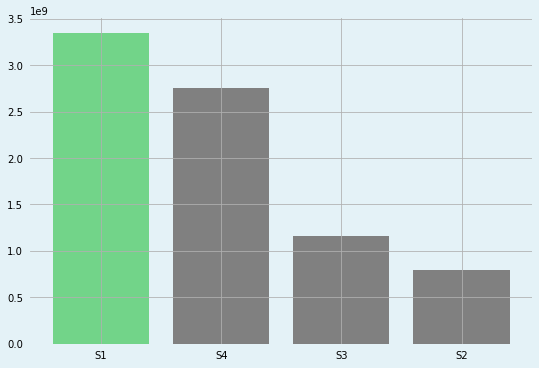

In [9]:
# Which are the best store types (by number of sales)?
best_store_type = train.groupby(['Store_Type'], as_index=False)['Sales'].sum()    
best_store_type = best_store_type.sort_values('Sales', ascending = False)                  
best_store_type['Store_Type'] = best_store_type['Store_Type'].astype(str)

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

# For changing colors
col1 = best_store_type.head(1)
col2 = best_store_type.tail(3)

ax.bar(col1.Store_Type, col1.Sales, color = '#72d489')
ax.bar(col2.Store_Type, col2.Sales, color = 'grey')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Store Types', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Title
plt.text(0.25, 3555000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(0.65, 3555000000, "Store Type", size=22, color="#72d489", fontweight="bold")
plt.text(1.6, 3555000000, "by", size=22, color="grey")
plt.text(1.82, 3555000000,"Total Sales", size=22, color="grey", fontweight="bold")

# Author
plt.text(22.5, -5000000, "@miguelfzzz", fontsize=11, ha="right", color='grey');

NameError: name 'ticker' is not defined

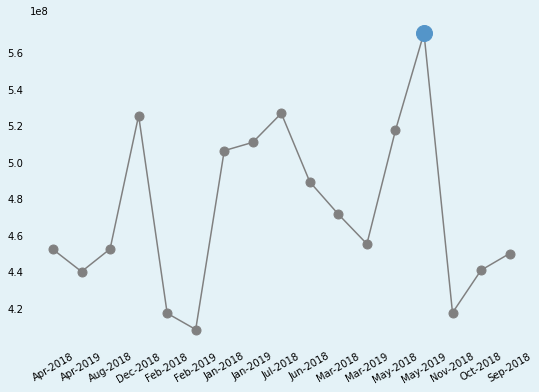

In [11]:
#Best months by sells
best_month = train.copy()
best_month['Month'] = best_month['Date'].apply(lambda x: x.strftime('%b-%Y')) 
best_month = best_month.groupby(['Month'], as_index=False)['Sales'].sum()  

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

best_month_1 = best_month.sort_values('Sales', ascending = False).head(1)

ax.plot(best_month.Month, best_month.Sales, marker='o', markerfacecolor='grey', color = 'gray', markersize=9)
ax.plot(best_month_1.Month, best_month_1.Sales, marker='o', markerfacecolor='#5495c9', color = '#5495c9', markersize=16)

plt.xticks(rotation=30)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Annotations
plt.text(13.4, 573000000, "May 2019 has been", size=10)
plt.text(13.4, 566000000, "the best month so far!", size=10)


# Title
plt.text(3.45, 582000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(5.1, 582000000, "Months", size=22, color="#5495c9", fontweight="bold")
plt.text(7.8, 582000000, "by", size=22, color="grey")
plt.text(8.8, 582000000,"Total Sales", size=22, color="grey", fontweight="bold")

# Author
plt.text(38, 43000, "@miguelfzzz", fontsize=11, ha="right", color='grey');

In [12]:
# Which are the best locations (by number of sales)?
best_location = train.groupby(['Location_Type'], as_index=False)['Sales'].sum()    
best_location['Location_Type'] = best_location['Location_Type'].astype(str)

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

# For changing colors
col1 = best_location.head(1)
col2 = best_location.tail(4)

ax.bar(col1.Location_Type, col1.Sales, color =ticker.EngFormatter '#ab90ff')
ax.bar(col2.Location_Type, col2.Sales, color = 'grey')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Location Types', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Title
plt.text(0.26, 3750000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(0.79, 3750000000, "Location Type", size=22, color="#ab90ff", fontweight="bold")
plt.text(2.3, 3750000000, "by", size=22, color="grey")
plt.text(2.6, 3750000000,"Total Sales", size=22, color="grey", fontweight="bold")

# Author
plt.text(22.5, -5000000, "@miguelfzzz", fontsize=11, ha="right", color='grey');

SyntaxError: invalid syntax (Temp/ipykernel_1880/2838633160.py, line 14)

NameError: name 'ticker' is not defined

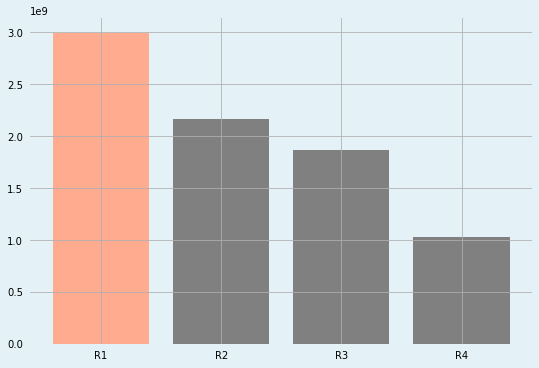

In [13]:
# Which are the best regions (by number of sales)?
best_region = train.groupby(['Region_Code'], as_index=False)['Sales'].sum()    
best_region['Region_Code'] = best_region['Region_Code'].astype(str)

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

# For changing colors
col1 = best_region.head(1)
col2 = best_region.tail(3)

ax.bar(col1.Region_Code, col1.Sales, color = '#ffab90')
ax.bar(col2.Region_Code, col2.Sales, color = 'grey')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Region Codes', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Title
plt.text(0.4, 3200000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(0.79, 3200000000, "Regions", size=22, color="#ffab90", fontweight="bold")
plt.text(1.47, 3200000000, "by", size=22, color="grey")
plt.text(1.71, 3200000000,"Total Sales", size=22, color="grey", fontweight="bold")

# Author
plt.text(22.5, -5000000, "@miguelfzzz", fontsize=11, ha="right", color='grey');

In [14]:
# Let's check the data again
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52


In [15]:
# Remove "ID" 
train = train.drop('ID', 1)

C:\Users\mohammed\AppData\Local\Temp/ipykernel_1880/947219649.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train = train.drop('ID', 1)


In [16]:
# Data types
print('Data type per variable:')
print(train.dtypes)

Data type per variable:
Store_id                 object
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                  object
Discount                 object
#Order                    int64
Sales                   float64
dtype: object


In [17]:
train[['Store_id','Holiday', 'Discount']] = train[['Store_id', 'Holiday', 'Discount']].astype(int)

In [18]:
categ_cols = train.dtypes[train.dtypes == np.object]  # filtering by categorical variables
categ_cols = categ_cols.index.tolist()     # list of categorical fields
train = pd.get_dummies(train, columns=categ_cols, drop_first=True)   # One hot encoding

C:\Users\mohammed\AppData\Local\Temp/ipykernel_1880/1060469910.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categ_cols = train.dtypes[train.dtypes == np.object]  # filtering by categorical variables


In [19]:
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day_of_week'] = train['Date'].dt.dayofweek
train['Weekday'] = train['Date'].dt.weekday
train['Quarter'] = train['Date'].dt.quarter

train = train.drop(['Date'], axis = 1) 

train = pd.get_dummies(train, columns=['Year'], drop_first=True, prefix='Year')
train = pd.get_dummies(train, columns=['Month'], drop_first=True, prefix='Month')
train = pd.get_dummies(train, columns=['Day_of_week'], drop_first=True, prefix='Day_of_week')
train = pd.get_dummies(train, columns=['Weekday'], drop_first=True, prefix='Weekday')
train = pd.get_dummies(train, columns=['Quarter'], drop_first=True, prefix='Quarter')

train.head()

,Store_id,Holiday,Discount,#Order,Sales,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,...,Day_of_week_6,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Quarter_2,Quarter_3,Quarter_4
0,1,1,1,9,7011.84,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,253,1,1,60,51789.12,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,252,1,1,42,36868.20,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,251,1,1,23,19715.16,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,250,1,1,62,45614.52,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


findfont: Font family ['Source Sans Pro'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Source Sans Pro'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Source Sans Pro'] not found. Falling back to DejaVu Sans.


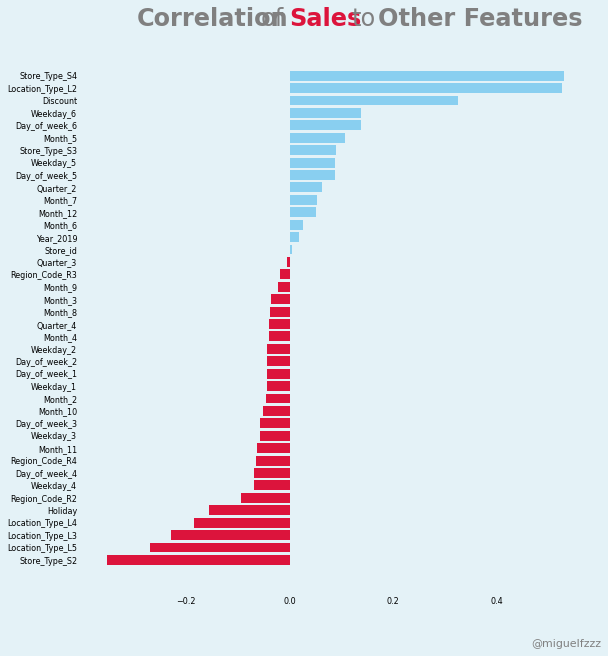

In [20]:
corr = train[train.columns].corr()['Sales'][:].sort_values(ascending=True).to_frame()
corr = corr.drop(corr[corr.Sales > 0.90].index)

# Visualization
fig, ax = plt.subplots(figsize =(9, 10))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

ax.barh(corr.index, corr.Sales, align='center', color = np.where(corr['Sales'] < 0, 'crimson', '#89CFF0'))

ax.tick_params(axis='both', which='major', labelsize=8)
ax.yaxis.set_label_coords(0, 0)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.text(-0.295, 43, "Correlation", size=24, color="grey", fontweight="bold");
plt.text(-0.055, 43, "of", size=24, color="grey");
plt.text(0, 43, "Sales", size=24, color="crimson", fontweight="bold");
plt.text(0.12, 43, "to", size=24, color="grey");
plt.text(0.17, 43, "Other Features", size=24, color="grey", fontweight="bold");

# Author
plt.text(0.6, -7, "@miguelfzzz", fontsize=11, ha="right", color='grey');

In [21]:
del train['Store_id']
del train['Year_2019']

In [22]:
train['holiday_and_discount'] = train['Holiday'] * train['Discount']

C:\Users\mohammed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'ticker' is not defined

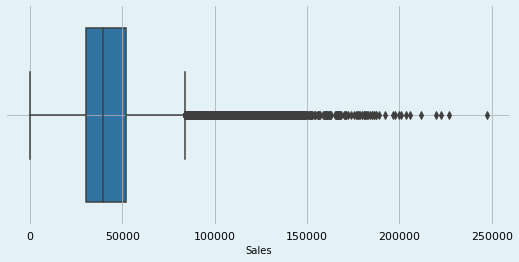

In [23]:
# Visualization
fig, ax = plt.subplots(figsize =(9, 4))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

sns.boxplot(train.Sales);

ax.tick_params(axis='both', which='major', labelsize=11)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.xaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.xlabel('Sales', fontsize=11);

plt.title('Sales Outliers (before)', size=22, fontweight="bold");

In [24]:
# Dealing with the outliers
q1 = train['Sales'].quantile(0.25)
q3 = train['Sales'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(train['Sales'])
for i in train['Sales']:
    if i > Upper_tail or i < Lower_tail:
            train['Sales'] = train['Sales'].replace(i, med)

# I took the code from this notebook -> https://www.kaggle.com/nareshbhat/outlier-the-silent-killer

C:\Users\mohammed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'ticker' is not defined

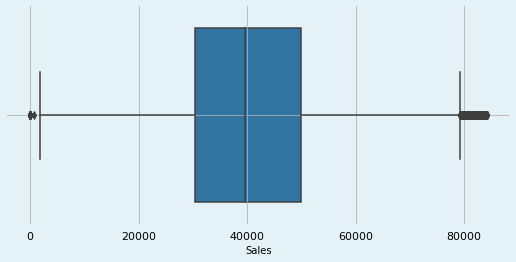

In [25]:
# Visualization
fig, ax = plt.subplots(figsize =(9, 4))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

sns.boxplot(train['Sales']);

ax.tick_params(axis='both', which='major', labelsize=11)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.xaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.xlabel('Sales', fontsize=11);

plt.title('Sales Outliers (after)', size=22, fontweight="bold");